
# Employee Attrition IBM Kaggle

In [1]:
import pandas as pd
import numpy as np

# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import warnings as w
w.filterwarnings("ignore")


This dataset provides a comprehensive and diverse analysis of an organization's employees, focusing on areas such as employee attrition, personal and work-related factors, and resources. main. Includes more than 35 attributes and their meanings are as follows:

|STT | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |





## Read data and calculate number of rows and columns 

In [2]:
df = pd.read_csv("original_data.csv")

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}\nNumber of columns: {num_cols}")

Number of rows: 1470
Number of columns: 35


### Does the data have duplicate lines?

In [4]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

**💬 Comment:** We see that there are no duplicate rows in the data.

### Percentage of missing values and descriptive statistics of each column

👉 Statistics of `numerical` columns

In [5]:
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = "missing_rate"
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
missing_rate,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


👉 Statistics of `category` columns

In [6]:
describe = df.describe(include=["O"])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = "missing_rate"
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


👉 `histogram` for `numerical` columns

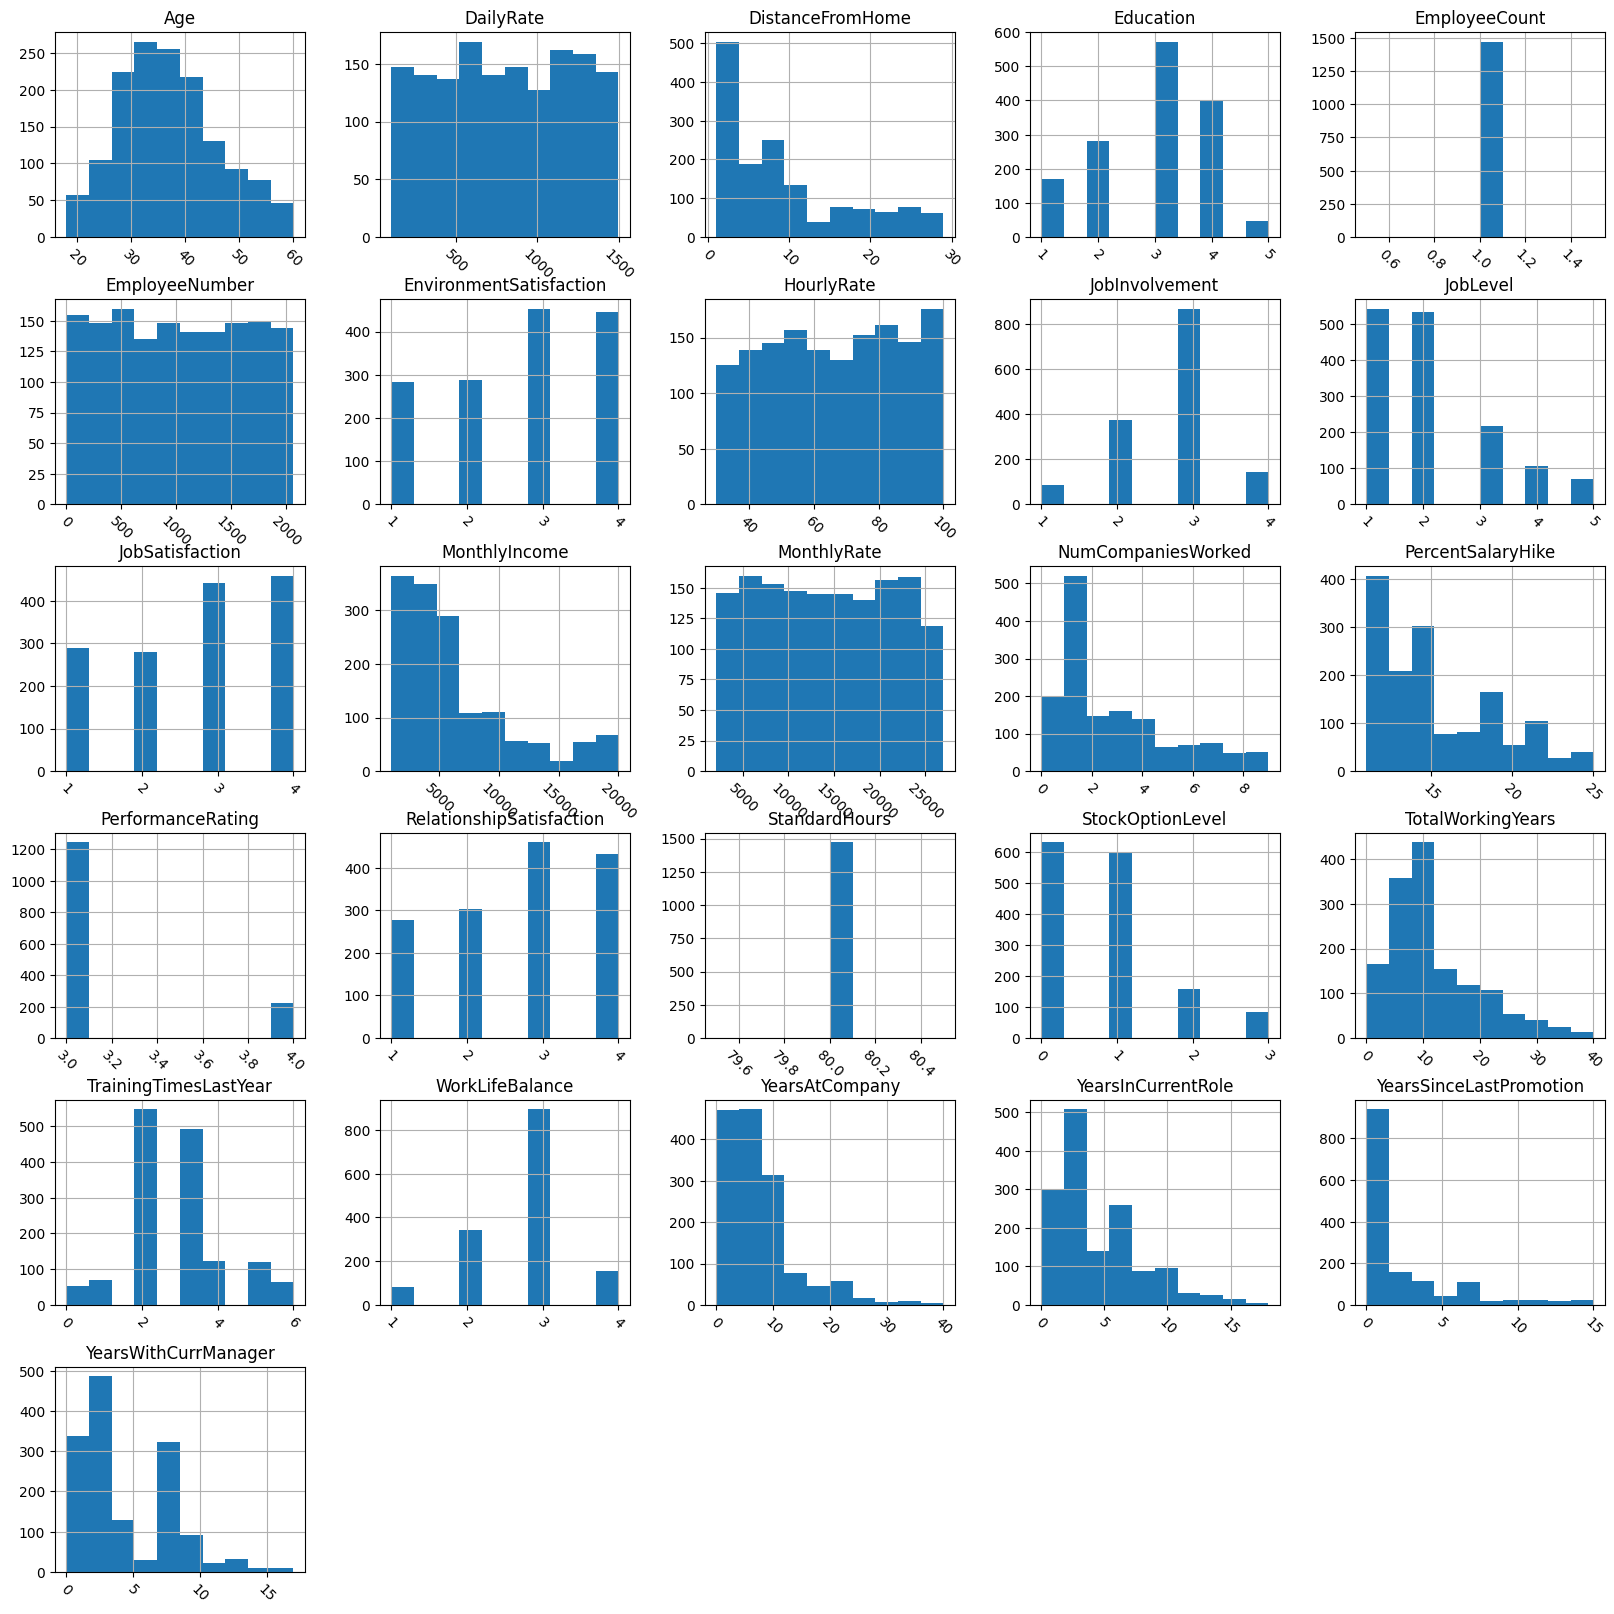

In [7]:
df.hist(figsize=(20, 20), xrot=-45)
plt.show()

###   The following columns can be omitted because their values do not affect the analysis results
1. `Over18`: All values are `Y`
2. `EmployeeCount`: all values are `1.0`
3. `StandardHours`: all values are `80.0`
4. `EmployeeNumber`: is the `id` of the employee that has the same meaning as the `index` of each line

## Data type of each column

In [8]:
col_dtype = df.dtypes
col_dtype

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

👉 We use `select_dtypes` method to list columns of type `numerical` and `category`.

In [9]:
cat_coulmns = df.select_dtypes(["object"]).columns
num_coulmns = df.select_dtypes(["number"]).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### Consider the value set of categorical attributes

In [10]:
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))

In [11]:
for col in cat_cols:
    print("Unique values of ", col, set(df[col]))

Unique values of  MaritalStatus {'Divorced', 'Married', 'Single'}
Unique values of  EducationField {'Life Sciences', 'Marketing', 'Technical Degree', 'Other', 'Medical', 'Human Resources'}
Unique values of  JobRole {'Laboratory Technician', 'Research Director', 'Manager', 'Manufacturing Director', 'Healthcare Representative', 'Sales Executive', 'Sales Representative', 'Research Scientist', 'Human Resources'}
Unique values of  BusinessTravel {'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'}
Unique values of  OverTime {'No', 'Yes'}
Unique values of  Attrition {'No', 'Yes'}
Unique values of  Gender {'Male', 'Female'}
Unique values of  Over18 {'Y'}
Unique values of  Department {'Human Resources', 'Research & Development', 'Sales'}


The value set of the categorical attributes is complete and easy to understand, so we do not need to perform preprocessing steps for these attributes.

### Consider the value distribution of numeric data columns

👉 Sum the missing values of each column using the `isnull()` and `sum()` methods, and then divide by the number of rows to get the percentage of missing values `missing_ratio`.

In [12]:
missing_ratio = df[num_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({"missing_ratio": missing_ratio})
missing_ratio_df

,missing_ratio
TotalWorkingYears,0.0
Age,0.0
DailyRate,0.0
RelationshipSatisfaction,0.0
YearsAtCompany,0.0
EmployeeCount,0.0
PerformanceRating,0.0
EnvironmentSatisfaction,0.0
EmployeeNumber,0.0
StockOptionLevel,0.0


### Visualize the distribution of missing values using the `missingno` . library

Text(0.5, 1.0, 'Distribution of Missing Values')

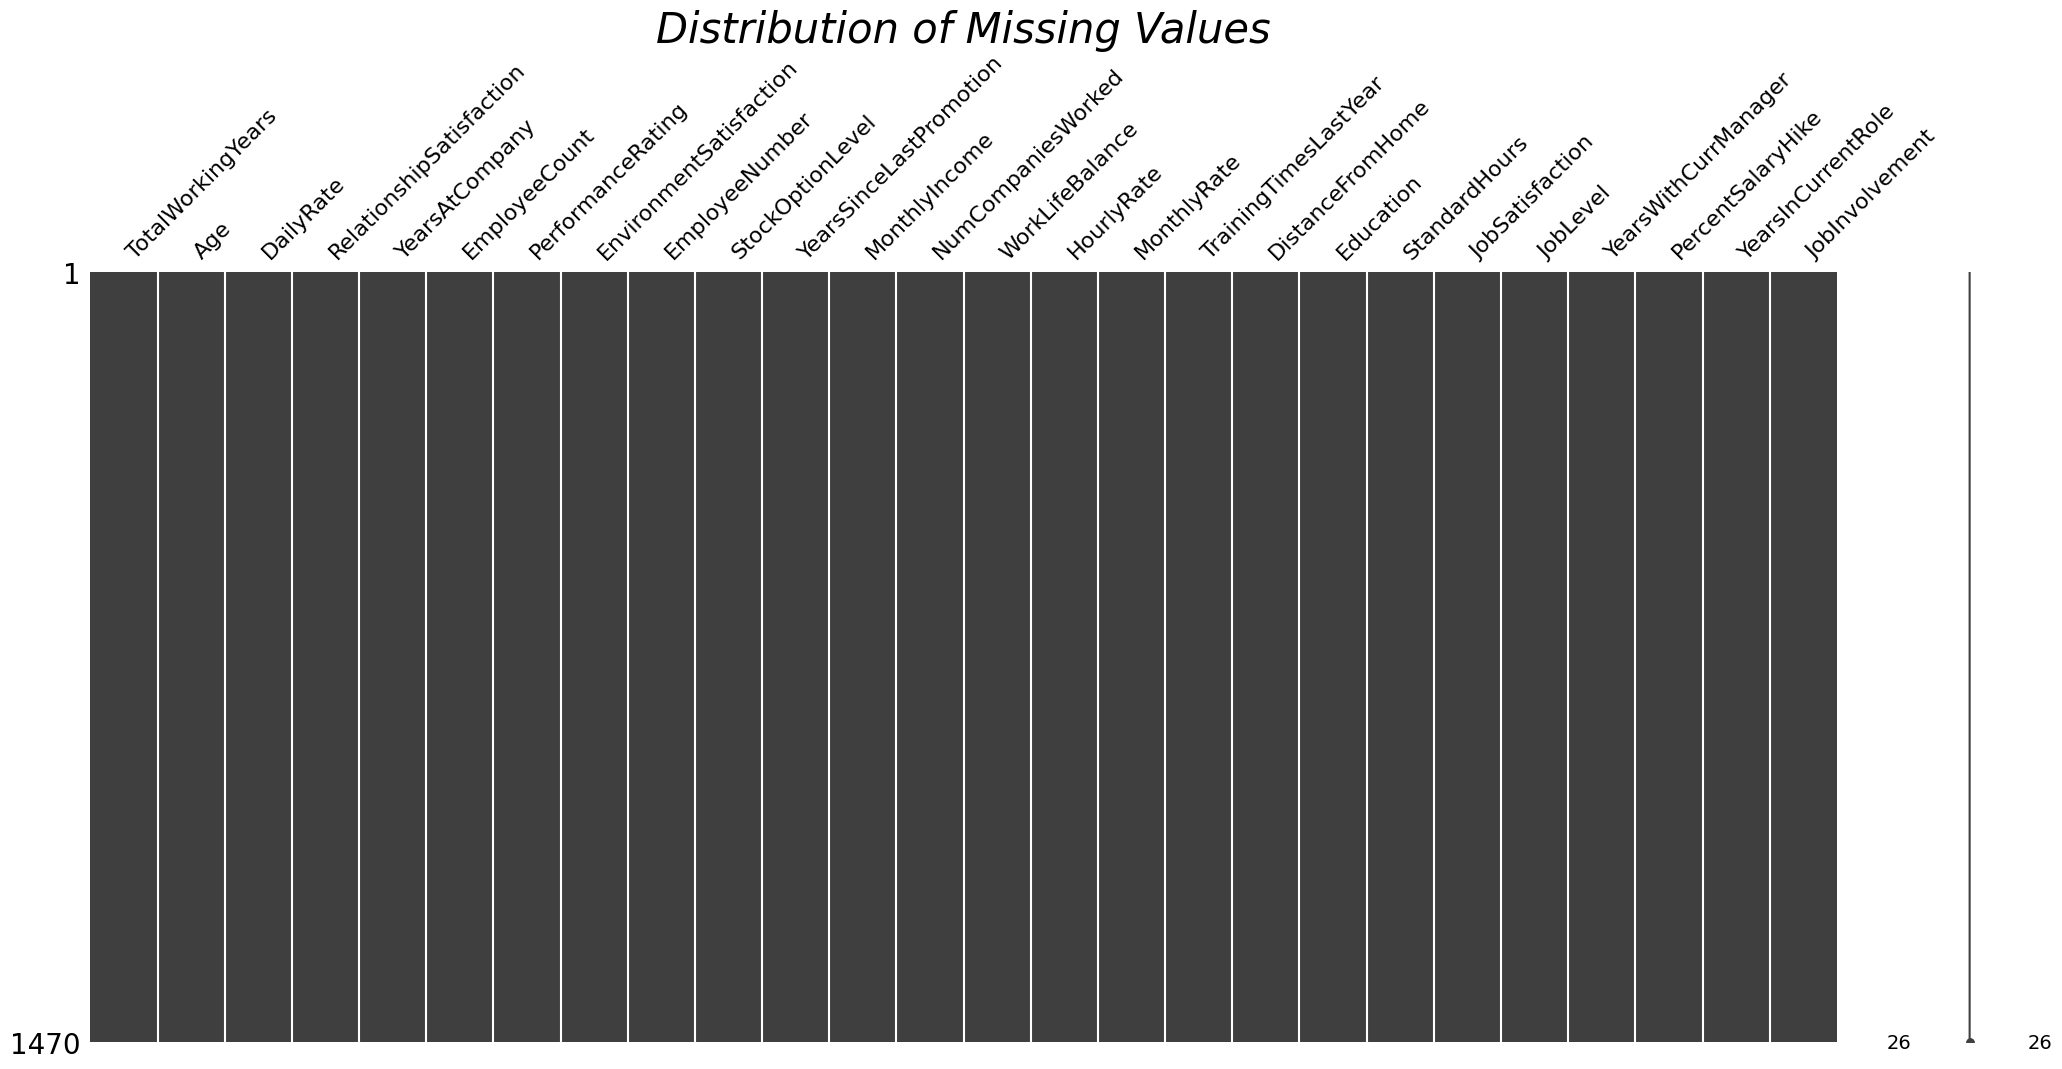

In [13]:
msno.matrix(df[num_cols])
plt.title("Distribution of Missing Values", fontsize=30, fontstyle="oblique")

👉 Calculate descriptive statistics using the `describe()` method.

In [14]:
num_cols_info_df = df[num_cols].describe()
num_cols_info_df

,TotalWorkingYears,Age,DailyRate,RelationshipSatisfaction,YearsAtCompany,EmployeeCount,PerformanceRating,EnvironmentSatisfaction,EmployeeNumber,StockOptionLevel,...,TrainingTimesLastYear,DistanceFromHome,Education,StandardHours,JobSatisfaction,JobLevel,YearsWithCurrManager,PercentSalaryHike,YearsInCurrentRole,JobInvolvement
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,36.923810,802.485714,2.712245,7.008163,1.0,3.153741,2.721769,1024.865306,0.793878,...,2.799320,9.192517,2.912925,80.0,2.728571,2.063946,4.123129,15.209524,4.229252,2.729932
std,7.780782,9.135373,403.509100,1.081209,6.126525,0.0,0.360824,1.093082,602.024335,0.852077,...,1.289271,8.106864,1.024165,0.0,1.102846,1.106940,3.568136,3.659938,3.623137,0.711561
min,0.000000,18.000000,102.000000,1.000000,0.000000,1.0,3.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,80.0,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000
25%,6.000000,30.000000,465.000000,2.000000,3.000000,1.0,3.000000,2.000000,491.250000,0.000000,...,2.000000,2.000000,2.000000,80.0,2.000000,1.000000,2.000000,12.000000,2.000000,2.000000
50%,10.000000,36.000000,802.000000,3.000000,5.000000,1.0,3.000000,3.000000,1020.500000,1.000000,...,3.000000,7.000000,3.000000,80.0,3.000000,2.000000,3.000000,14.000000,3.000000,3.000000
75%,15.000000,43.000000,1157.000000,4.000000,9.000000,1.0,3.000000,4.000000,1555.750000,1.000000,...,3.000000,14.000000,4.000000,80.0,4.000000,3.000000,7.000000,18.000000,7.000000,3.000000
max,40.000000,60.000000,1499.000000,4.000000,40.000000,1.0,4.000000,4.000000,2068.000000,3.000000,...,6.000000,29.000000,5.000000,80.0,4.000000,5.000000,17.000000,25.000000,18.000000,4.000000


### Combine `missing_ratio_df` and `num_cols_info_df` to fully observe the required statistical values.

In [15]:
num_cols_info_df = pd.concat([missing_ratio_df.transpose(), num_cols_info_df], axis=0)
pd.set_option("display.max_columns", None)
display(num_cols_info_df)
pd.reset_option("display.max_columns")

,TotalWorkingYears,Age,DailyRate,RelationshipSatisfaction,YearsAtCompany,EmployeeCount,PerformanceRating,EnvironmentSatisfaction,EmployeeNumber,StockOptionLevel,YearsSinceLastPromotion,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,HourlyRate,MonthlyRate,TrainingTimesLastYear,DistanceFromHome,Education,StandardHours,JobSatisfaction,JobLevel,YearsWithCurrManager,PercentSalaryHike,YearsInCurrentRole,JobInvolvement
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,11.279592,36.923810,802.485714,2.712245,7.008163,1.0,3.153741,2.721769,1024.865306,0.793878,2.187755,6502.931293,2.693197,2.761224,65.891156,14313.103401,2.799320,9.192517,2.912925,80.0,2.728571,2.063946,4.123129,15.209524,4.229252,2.729932
std,7.780782,9.135373,403.509100,1.081209,6.126525,0.0,0.360824,1.093082,602.024335,0.852077,3.222430,4707.956783,2.498009,0.706476,20.329428,7117.786044,1.289271,8.106864,1.024165,0.0,1.102846,1.106940,3.568136,3.659938,3.623137,0.711561
min,0.000000,18.000000,102.000000,1.000000,0.000000,1.0,3.000000,1.000000,1.000000,0.000000,0.000000,1009.000000,0.000000,1.000000,30.000000,2094.000000,0.000000,1.000000,1.000000,80.0,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000
25%,6.000000,30.000000,465.000000,2.000000,3.000000,1.0,3.000000,2.000000,491.250000,0.000000,0.000000,2911.000000,1.000000,2.000000,48.000000,8047.000000,2.000000,2.000000,2.000000,80.0,2.000000,1.000000,2.000000,12.000000,2.000000,2.000000
50%,10.000000,36.000000,802.000000,3.000000,5.000000,1.0,3.000000,3.000000,1020.500000,1.000000,1.000000,4919.000000,2.000000,3.000000,66.000000,14235.500000,3.000000,7.000000,3.000000,80.0,3.000000,2.000000,3.000000,14.000000,3.000000,3.000000
75%,15.000000,43.000000,1157.000000,4.000000,9.000000,1.0,3.000000,4.000000,1555.750000,1.000000,3.000000,8379.000000,4.000000,3.000000,83.750000,20461.500000,3.000000,14.000000,4.000000,80.0,4.000000,3.000000,7.000000,18.000000,7.000000,3.000000
max,40.000000,60.000000,1499.000000,4.000000,40.000000,1.0,4.000000,4.000000,2068.000000,3.000000,15.000000,19999.000000,9.000000,4.000000,100.000000,26999.000000,6.000000,29.000000,5.000000,80.0,4.000000,5.000000,17.000000,25.000000,18.000000,4.000000



- Numeric data columns have absolutely no missing values.
- The min, lower quartile, median, upper quartile and max values do not show anomalies so we do not need to perform preprocessing steps for these numeric attributes.

### Consider the value distribution of non-numeric data columns

In [16]:
missing_ratio = df[cat_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({"missing_ratio": missing_ratio})
missing_ratio_df

,missing_ratio
MaritalStatus,0.0
EducationField,0.0
JobRole,0.0
BusinessTravel,0.0
OverTime,0.0
Attrition,0.0
Gender,0.0
Over18,0.0
Department,0.0


Text(0.5, 1.0, 'Distribution of Missing Values')

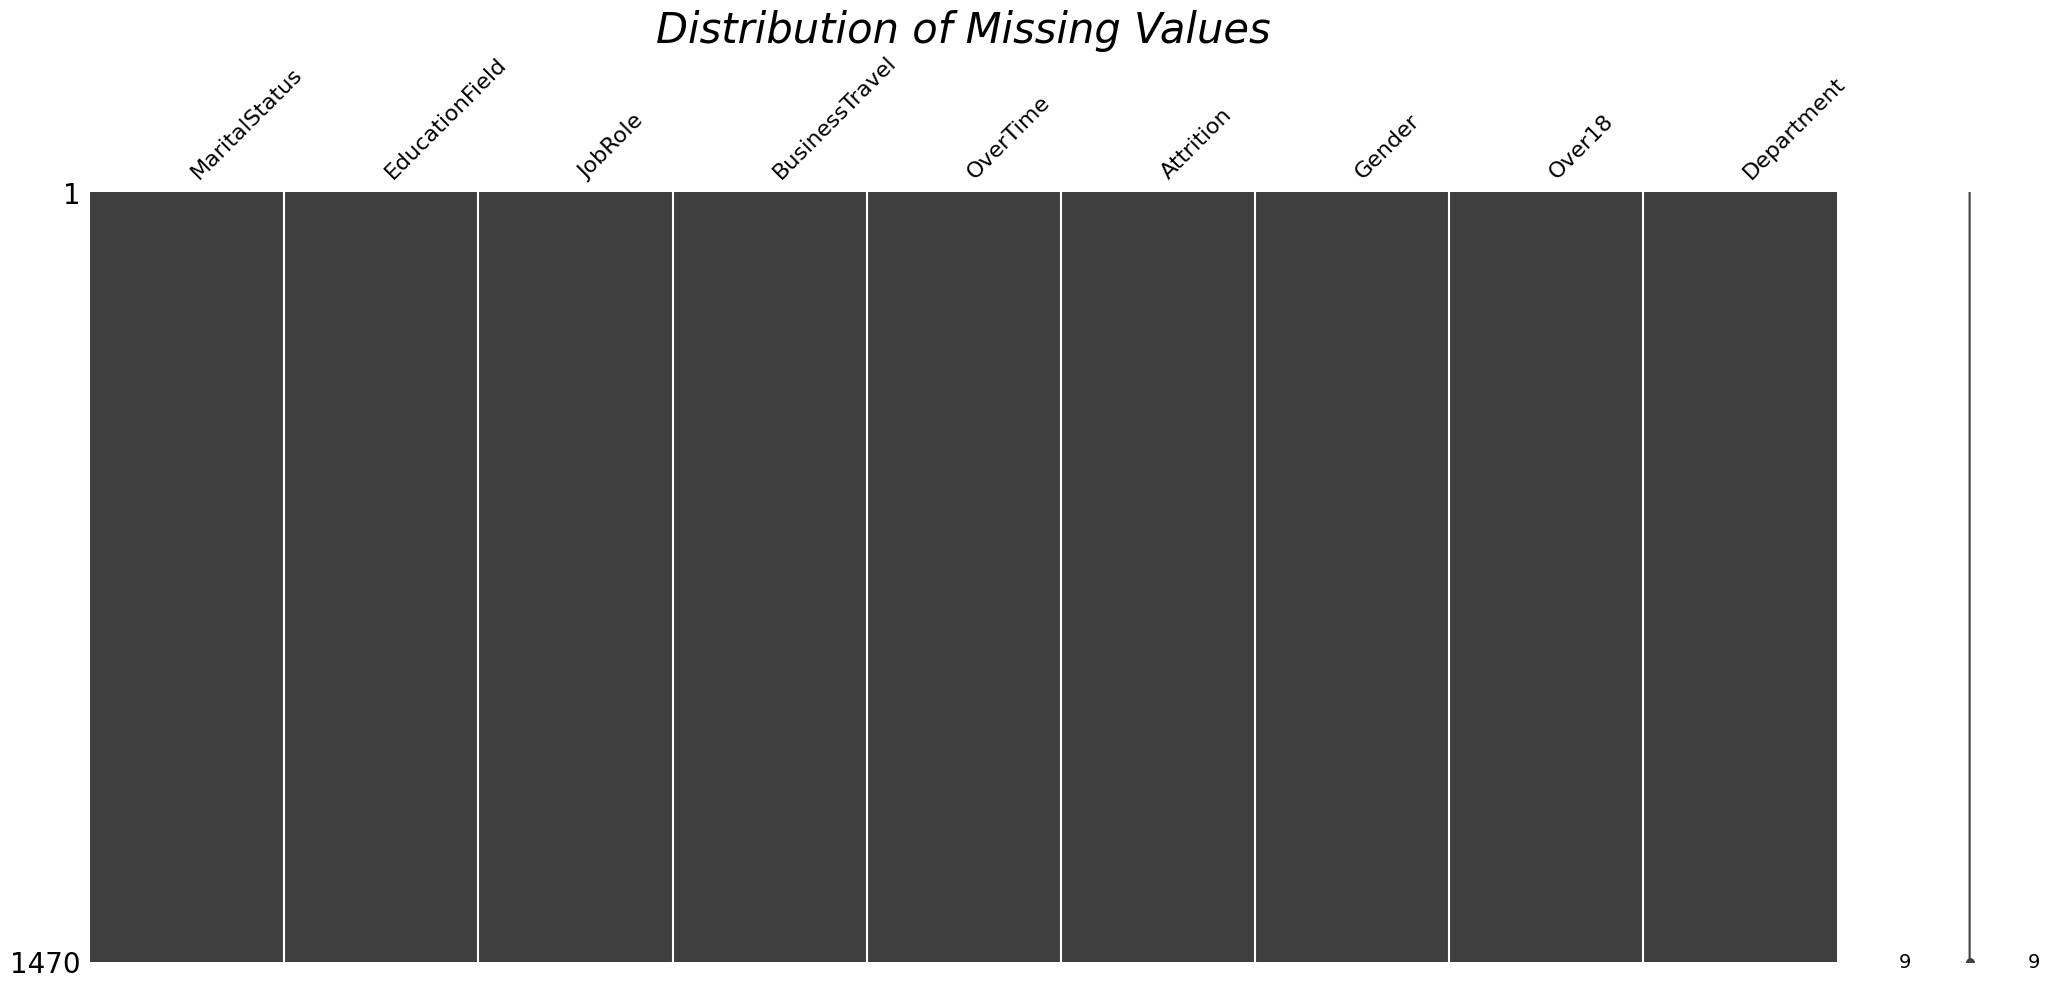

In [17]:
msno.matrix(df[cat_cols])
plt.title("Distribution of Missing Values", fontsize=30, fontstyle="oblique")

👉 Calculate the number of different values using the nunique() method.

In [18]:
n_values_df = pd.DataFrame({"n_values": df[cat_cols].nunique()})
n_values_df

,n_values
MaritalStatus,3
EducationField,6
JobRole,9
BusinessTravel,3
OverTime,2
Attrition,2
Gender,2
Over18,1
Department,3


👉 Calculate the ratio of each value using the `value_counts()` method.

In [19]:
value_ratios_dict = {}
for col in cat_cols:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({"value_ratios": value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[cat_cols]
value_ratios_df

,MaritalStatus,EducationField,JobRole,BusinessTravel,OverTime,Attrition,Gender,Over18,Department
value_ratios,"{'Married': 45.78231292517007, 'Single': 31.97...","{'Life Sciences': 41.224489795918366, 'Medical...","{'Sales Executive': 22.176870748299322, 'Resea...","{'Travel_Rarely': 70.95238095238095, 'Travel_F...","{'No': 71.70068027210884, 'Yes': 28.2993197278...","{'No': 83.87755102040816, 'Yes': 16.1224489795...","{'Male': 60.0, 'Female': 40.0}",{'Y': 100.0},"{'Research & Development': 65.37414965986395, ..."


In [20]:
cat_cols_info_df = pd.concat(
    [missing_ratio_df.transpose(), n_values_df.transpose(), value_ratios_df], axis=0
)
pd.set_option("display.max_colwidth", None)
display(cat_cols_info_df)
pd.reset_option("display.max_colwidth")

,MaritalStatus,EducationField,JobRole,BusinessTravel,OverTime,Attrition,Gender,Over18,Department
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_values,3,6,9,3,2,2,2,1,3
value_ratios,"{'Married': 45.78231292517007, 'Single': 31.97278911564626, 'Divorced': 22.244897959183675}","{'Life Sciences': 41.224489795918366, 'Medical': 31.564625850340132, 'Marketing': 10.816326530612246, 'Technical Degree': 8.979591836734693, 'Other': 5.578231292517007, 'Human Resources': 1.8367346938775513}","{'Sales Executive': 22.176870748299322, 'Research Scientist': 19.86394557823129, 'Laboratory Technician': 17.61904761904762, 'Manufacturing Director': 9.863945578231291, 'Healthcare Representative': 8.91156462585034, 'Manager': 6.938775510204081, 'Sales Representative': 5.646258503401361, 'Research Director': 5.442176870748299, 'Human Resources': 3.537414965986395}","{'Travel_Rarely': 70.95238095238095, 'Travel_Frequently': 18.843537414965986, 'Non-Travel': 10.204081632653061}","{'No': 71.70068027210884, 'Yes': 28.29931972789116}","{'No': 83.87755102040816, 'Yes': 16.122448979591837}","{'Male': 60.0, 'Female': 40.0}",{'Y': 100.0},"{'Research & Development': 65.37414965986395, 'Sales': 30.34013605442177, 'Human Resources': 4.285714285714286}"


- Non-numeric data columns have absolutely no missing values.
- The attribute 'Over18' has only 1 value, 'Y', indicating that all employees in the dataset are over 18 years old.

# Discovering Relationships in Data

## Chart 1

**Title:** Consider the rate of employees leaving the organization or not.

**Chart type:** Donut chart.

**Visualization:**

In [21]:
plot_df = df.copy()
plot_df = plot_df["Attrition"].value_counts()

fig = make_subplots(
    rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=("", "")
)
fig.add_trace(
    go.Pie(values=plot_df.values, labels=plot_df.index, hole=0.3), row=1, col=1
)

fig.update_traces(
    hoverinfo="label",
    textfont_size=18,
    textposition="auto",
    marker=dict(colors=["#335C42", "#7E7F92"], line=dict(color="white", width=2)),
)
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/Voluntary-Resignation--1-.png",
        xref="paper",
        yref="paper",
        x=1.2,
        y=0.25,
        sizex=0.7,
        sizey=1,
        xanchor="right",
        yanchor="bottom",
        sizing="contain",
    )
)

fig.update_layout(
    title={"text": "<b>Attrition rate of the organization's forces</b>", "x": 0.21},
    template="xgridoff",
    width=900,
    height=600,
    legend=dict(
        title_font_family="Times New Roman",
        font=dict(family="Courier", size=25, color="black"),
        bgcolor="#E4F5CA",
        bordercolor="Black",
        borderwidth=2.5,
    ),
)
iplot(fig)

- The employee turnover rate of this organization is 16.1%. And according to experts in the field of human resources, the human resource consumption rate of each enterprise from 4% to 6% is a stable level.

=> The turnover rate of this organization is at a dangerous level. Therefore, the organization should take measures to reduce this ratio.

## Chart 2

**Title:** Ratio of men and women in the organization.

**Chart type:** Pie chart (pie chart).

**Visualization:**

In [22]:
plot_df = df.copy()
plot_df = plot_df["Gender"].value_counts()

fig = make_subplots(
    rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]], subplot_titles=("", "")
)
fig.add_trace(go.Pie(values=plot_df.values, labels=plot_df.index), row=1, col=2)

fig.update_traces(
    hoverinfo="label",
    textfont_size=18,
    textposition="auto",
    marker=dict(colors=["#AC1F29", "#7E7F92"], line=dict(color="white", width=2)),
)
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/ntclai/PictureForMyProject/main/viz.jpg",
        xref="paper",
        yref="paper",
        x=0.5,
        y=0.20,
        sizex=0.6,
        sizey=1,
        xanchor="right",
        yanchor="bottom",
        sizing="contain",
    )
)

fig.update_layout(
    title={"text": "<b>Gender rate of the organization's forces</b>", "x": 0.21},
    template="xgridoff",
    width=900,
    height=600,
    legend=dict(
        title_font_family="Times New Roman",
        font=dict(family="Courier", size=25, color="black"),
        bgcolor="#EFFAD3",
        bordercolor="Black",
        borderwidth=2.5,
    ),
)
iplot(fig)

The number of male employees in the company accounts for a higher proportion than female employees (more than 20%).

## Chart 3

**Title:** Ratio of ranks in work

**Chart Type:** TreeMap

**Visualization:**

In [23]:
plot_df = df.copy()
plot_df["JobLevel"] = pd.Categorical(plot_df["JobLevel"]).rename_categories(
    ["Entry level", "Mid level", "Senior", "Lead", "Executive"]
)

plot_df = plot_df["JobLevel"].value_counts()

fig = px.treemap(
    plot_df,
    path=[plot_df.index],
    values=plot_df.values,
    title="Distribution of Job Level",
    color=plot_df.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    template="plotly_dark",
    width=1000,
    height=500,
)

percents = np.round((100 * plot_df.values / sum(plot_df.values)).tolist(), 2)

fig.data[0].customdata = [36.94, 4.69, 7.21, 36.33, 14.83]
fig.data[0].texttemplate = "%{label}<br>%{value}<br>%{customdata}%"

fig.update_layout(font=dict(size=19, family="Franklin Gothic"))
fig.show()

From the TreeMap, we see:
- 'Entry level' (job position of people with little work experience) accounted for the largest number with 543 people (accounting for 36.94%), corresponding to the rectangle with the largest area. Next is 'Mid level' with 534 people (36.33%).
- Occupy the least percentage of 'Executive' (senior positions with very important roles in each department) with only 69 people (accounting for 4.69%).

=> The higher the rank in the job, the smaller the number of employees.

## Chart 4

**Title:** Percentage of levels in work

**Chart Type:** BarPlot

**Visualization:**

In [24]:
plot_df = df.copy()
plot_df["JobLevel"] = pd.Categorical(plot_df["JobLevel"]).rename_categories(
    ["Entry level", "Mid level", "Senior", "Lead", "Executive"]
)

plot_df = plot_df["JobLevel"].value_counts()

colors = ["#1d7874", "#679289", "#f4c095", "#ee2e31", "#ffb563", "#918450"]
data = go.Bar(
    x=plot_df.index,
    y=plot_df.values,
    text=plot_df.values,
    textposition="inside",
    textfont=dict(size=12, color="black"),
    marker=dict(color=colors, opacity=0.7, line_color="black", line_width=2),
)
layout = go.Layout(
    title={
        "text": "<b>Distribution of Attrition by Job Level</b>",
        "x": 0.5,
        "xanchor": "center",
    },
    xaxis=dict(title="<b>Job Level</b>"),
    yaxis=dict(title="<b>The number of employees</b>"),
    width=900,
    height=600,
    template="plotly_white",
)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

Based on the bar chart above we can see:
- Employees at Level 1 (Entry level) have a very high rate of leaving the company (60%). They are usually very young people.
- Employees at Level 2 (Middle Level) have a relatively high turnover rate (21%)
- Employees who achieve Level 4 (Lead) and 5 (Executive) have a very low turnover rate.
  
=> Young employees who have just joined the company have a very high ability to "jump".

## Chart 5

**Title:** Distribution of working overtime in job roles.

**Chart type:** Stacked bar chart.

**Visualization:**

In [25]:
fig = px.histogram(
    data_frame=df,
    x="JobRole",
    color="OverTime",
    width=1000,
    height=500,
    template="simple_white",
)

fig.update_layout(
    title={
        "text": "Job Role by Job Role",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    }
)
fig.show()

- The 3 positions with the most personnel are: Sale Executive, Research Scientist and Laboratory Technician.
- The rate of working OverTime is nearly 2 times that of the group that does not work overtime. The trend of working OT is increasingly popular.

## Chart 6

**Title:** Relationship between leaving rate and job satisfaction.

**Chart type:** Bar chart + line plot.

**Visualization:**

In [26]:
new_df = df.groupby("EnvironmentSatisfaction").count()
idx = list(new_df.index)  # get groups as group 1, group 2, group 3, group 4
count = list(new_df["Age"].values)

percent_dropout = []  # list contains employees dropout percent
for i in range(len(idx)):
    percent_dropout.append(
        round(
            (
                len(
                    df[df["EnvironmentSatisfaction"] == idx[i]][
                        df["Attrition"] == "Yes"
                    ]
                )
                / count[i]
            )
            * 100,
            3,
        )
    )

In [27]:
envSat_attrition_df = {idx[i]: [count[i], percent_dropout[i]] for i in range(len(idx))}
envSat_attrition_df["Statistical"] = ["Number of employees", "Percentage of leave"]
envSat_attrition_df = pd.DataFrame(envSat_attrition_df).set_index("Statistical")
envSat_attrition_df.head()

,1,2,3,4
Statistical,,,,
Number of employees,284.000,287.000,453.000,446.000
Percentage of leave,25.352,14.983,13.687,13.453


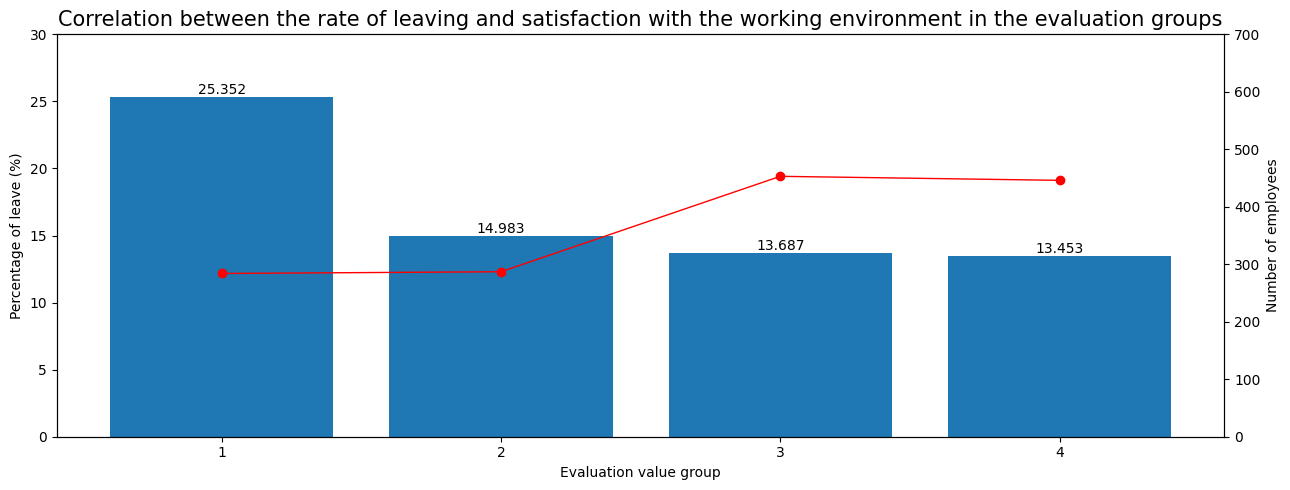

In [28]:
groups = ["1", "2", "3", "4"]
fig, ax1 = plt.subplots(figsize=(13, 5))  # bar chart
bars = ax1.bar(groups, envSat_attrition_df.loc[["Percentage of leave"]].values[0])
for rect in bars:
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
    )
ax2 = ax1.twinx()
ax2.plot(
    groups,
    envSat_attrition_df.loc[["Number of employees"]].values[0],
    lw=1,
    marker="o",
    color="r",
)
ax1.set(xlabel="Evaluation value group", ylabel="Percentage of leave (%)")
ax2.set(ylabel="Number of employees")
ax1.set_ylim(0, 30)
ax2.set_ylim(0, 700)
ax1.set_title(
    f"Correlation between the rate of leaving and satisfaction with the working environment in the evaluation groups",
    size=15,
)
fig.tight_layout()
plt.show()

- The number of employees who are satisfied with the working environment is also very high, as is the job satisfaction.
- The average rate of leaving is higher in the low-rated groups than in the high-value groups. This is also very consistent with reality.
- From here, it shows that besides salary, the working environment factor is also an important factor that determines whether employees really stick around for a long time or not.

## Chart 7

**Title:** How does the average salary change according to the number of years working at the company?

**Chart type:** Line chart

**Visualization:**

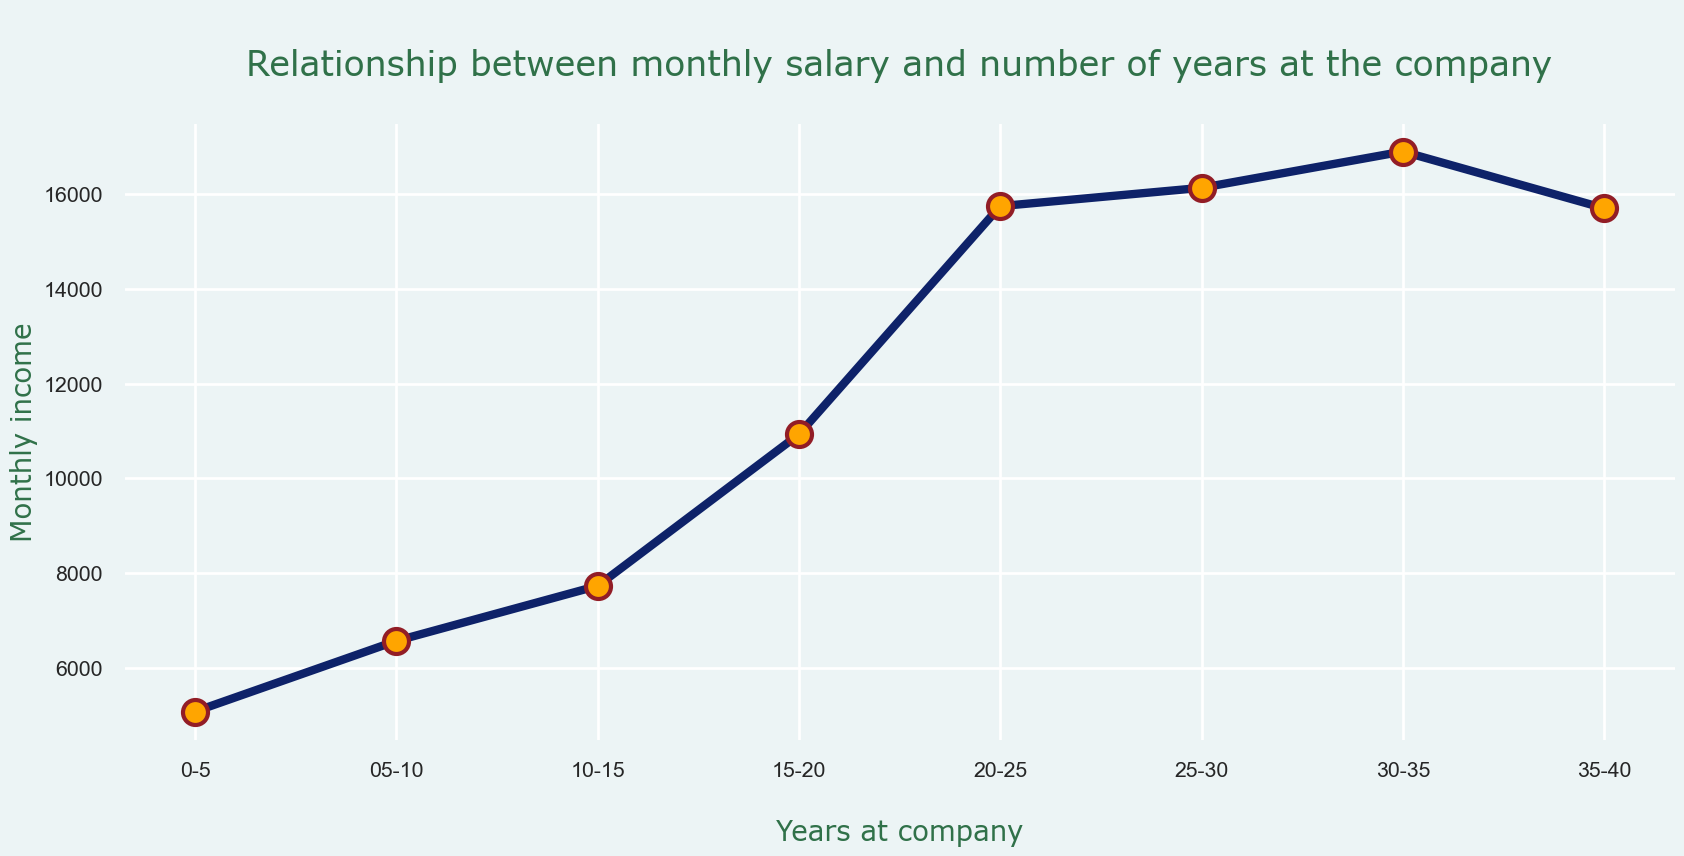

In [29]:
temp = df.copy()
conditions = [
    (temp["YearsAtCompany"] >= 0) & (temp["YearsAtCompany"] <= 5),
    (temp["YearsAtCompany"] > 5) & (temp["YearsAtCompany"] <= 10),
    (temp["YearsAtCompany"] > 10) & (temp["YearsAtCompany"] <= 15),
    (temp["YearsAtCompany"] > 15) & (temp["YearsAtCompany"] <= 20),
    (temp["YearsAtCompany"] > 20) & (temp["YearsAtCompany"] <= 25),
    (temp["YearsAtCompany"] > 25) & (temp["YearsAtCompany"] <= 30),
    (temp["YearsAtCompany"] > 30) & (temp["YearsAtCompany"] <= 35),
    (temp["YearsAtCompany"] > 35) & (temp["YearsAtCompany"] <= 40),
]
values = ["0-5", "05-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40"]
temp["YearsRange"] = np.select(conditions, values)

plot_df = temp.groupby(["YearsRange"])["MonthlyIncome"].mean().reset_index()

sns.set(rc={"axes.facecolor": "#ECF4F5", "figure.facecolor": "#ECF4F5"})
sns.set_context("poster", font_scale=0.7)
plt.subplots(figsize=(20, 8))
p = sns.lineplot(
    x=plot_df["YearsRange"],
    y=plot_df["MonthlyIncome"],
    data=plot_df,
    color="#0E2269",
    marker="o",
    linewidth=6,
    markersize=18,
    markerfacecolor="orange",
    markeredgecolor="#921D26",
    markeredgewidth=3,
)
p.axes.set_title(
    "\nRelationship between monthly salary and number of years at the company\n",
    fontsize=25,
    color="#307149",
    family="Verdana",
)
p.axes.set_xlabel("\nYears at company", fontsize=20, color="#307149", family="Verdana")
p.axes.set_ylabel("Monthly income", fontsize=20, color="#307149", family="Verdana")
sns.despine(left=True, bottom=True)
plt.show()

- During the period of working with the company from 0-35 years, the average salary of employees increases gradually over time. This proves that when working for a long time, that employee will have more work experience and be a loyal employee to the company. Should have a decent salary is worth it.

- However, the salary for working period from 35-40 years has decreased but not too big. The reason for this decline may be that when they have been with the company for 35-40 years, these employees are nearing retirement age, so their productivity decreases or they have ceded senior positions. for young leaders,...

## Chart 8

**Title:** Degree of business travel in each department

**Chart type:** Radar chart

**Visualization:**

In [30]:
plot_df = df.groupby(["Department", "BusinessTravel"]).size()
Human_Resources = np.round(
    plot_df["Human Resources"].values / (plot_df["Human Resources"].values.sum()), 2
)
Research_Development = np.round(
    plot_df["Research & Development"].values
    / (plot_df["Research & Development"].values.sum()),
    2,
)
Sales = np.round(plot_df["Sales"].values / (plot_df["Sales"].values.sum()), 2)

categories = ["Non-Travel", "Travel_Frequently", "Travel_Rarely"]
fig = go.Figure()
fig.add_trace(
    go.Scatterpolar(
        r=Human_Resources, theta=categories, fill="toself", name="Human_Resources"
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=Research_Development,
        theta=categories,
        fill="toself",
        name="Research_Development",
    )
)
fig.add_trace(go.Scatterpolar(r=Sales, theta=categories, fill="toself", name="Sales"))
fig.update_layout(
    polar=dict(radialaxis=dict(range=[0, 1])),
    font=dict(family="Franklin Gothic", size=17),
    showlegend=True,
    title="Situation of business travel of departments",
    height=500,
    width=1000,
)
fig.layout.template = "plotly_dark"
fig.show()

Based on the above Radar chart, we can see:
- The triangles are almost stacked, showing that the level of business travel in the departments is quite similar.
- The rate of 'Travel_Rarely' (rarely traveling for business) is the highest and 'Non-Travel' (never traveling for business) is the lowest in all departments. This ratio is quite common in companies, because it is common to go to work or to belong to high-ranking positions in the work, and the higher the rank, the smaller the number of employees (as evidenced in the figure below). chart 1).

## Chart 9

**Title:** Percentage of employees by age in the company.

**Chart Type:** TreeMap

**Visualization:**

In [31]:
new_df = df.loc[
    :,
    [
        "Age",
        "Attrition",
        "BusinessTravel",
        "Department",
        "EducationField",
        "EnvironmentSatisfaction",
        "Gender",
        "JobInvolvement",
        "JobLevel",
        "JobRole",
        "JobSatisfaction",
        "MaritalStatus",
        "MonthlyIncome",
        "Over18",
        "OverTime",
        "StockOptionLevel",
        "TotalWorkingYears",
        "YearsAtCompany",
        "YearsInCurrentRole",
        "YearsWithCurrManager",
    ],
]
new_df["Attrition"] = new_df["Attrition"].replace("Yes", 1).replace("No", 0)

In [32]:
dodi = new_df.copy()
conditions = [
    (dodi["Age"] >= 18) & (dodi["Age"] <= 20),
    (dodi["Age"] > 20) & (dodi["Age"] <= 25),
    (dodi["Age"] > 25) & (dodi["Age"] <= 30),
    (dodi["Age"] > 30) & (dodi["Age"] <= 35),
    (dodi["Age"] > 35) & (dodi["Age"] <= 40),
    (dodi["Age"] > 40) & (dodi["Age"] <= 45),
    (dodi["Age"] > 45) & (dodi["Age"] <= 50),
    (dodi["Age"] > 50) & (dodi["Age"] <= 55),
    (dodi["Age"] > 55) & (dodi["Age"] <= 60),
]

values = [
    "18-20",
    "21-25",
    "26-30",
    "31-35",
    "36-40",
    "41-45",
    "46-50",
    "51-55",
    "56-60",
]
new_df["Age_Range"] = np.select(conditions, values)
percent_age_range = new_df["Age_Range"].value_counts().values / new_df.shape[0] * 100
for i in range(len(percent_age_range)):
    percent_age_range[i] = "{:.2f}".format(percent_age_range[i])

    plot_df = new_df["Age_Range"].value_counts()
plot_df = pd.DataFrame({"Age_Range": plot_df.index, "Count": plot_df.values})
plot_df["Percent"] = percent_age_range

In [33]:
fig = px.treemap(
    plot_df,
    path=["Age_Range"],
    values="Count",
    title="Distribution of Job Level",
    color=plot_df.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    template="plotly_dark",
    hover_data=["Percent"],
    width=1000,
    height=500,
)

fig.data[0].texttemplate = "%{label}<br>%{value}<br>%{customdata[0]}%"

fig.update_layout(font=dict(size=19, family="Franklin Gothic"))
fig.show()

- The number of employees aged between 31-35 accounts for the highest proportion (23%)
- Employees between the ages of 26-30 and 36-40 account for a high percentage (18%)
- The number of employees aged 18-20 accounts for the lowest percentage (2%).
- Employees between the ages of 56-60 are also quite low (3%)

=> This is a reasonable distribution because the age groups with the highest percentage are the most productive age groups.

## Chart 10

**Title:** Difference in monthly salary between job ranks

**Chart type:** Violin plot

**Visualization:**

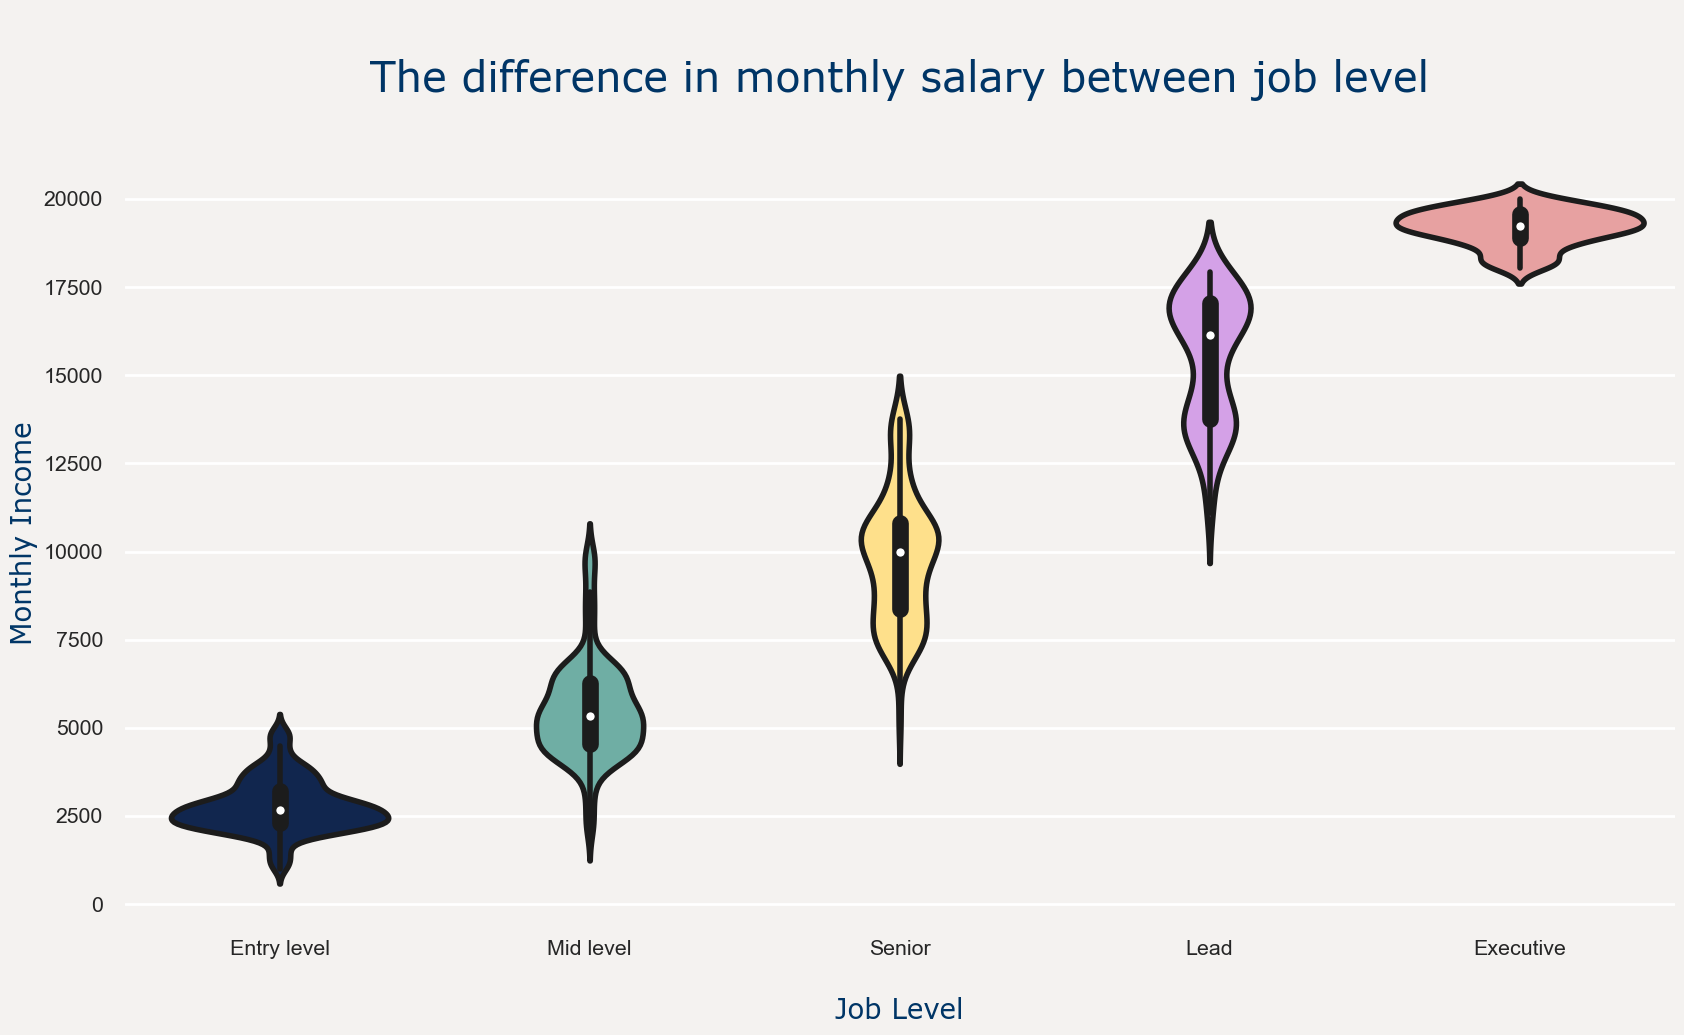

In [34]:
palette = ["#11264e", "#6faea4", "#FEE08B", "#D4A1E7", "#E7A1A1"]
sns.set(rc={"axes.facecolor": "#F4F2F0", "figure.facecolor": "#F4F2F0"})
sns.set_context("poster", font_scale=0.7)

plot_df = df.copy()
plot_df["JobLevel"] = pd.Categorical(plot_df["JobLevel"]).rename_categories(
    ["Entry level", "Mid level", "Senior", "Lead", "Executive"]
)

plt.subplots(figsize=(20, 10))

p = sns.violinplot(
    x=plot_df["JobLevel"],
    y=plot_df["MonthlyIncome"],
    order=plot_df["JobLevel"].value_counts().index,
    palette=palette,
    saturation=1,
    linewidth=4,
    edgecolor="black",
)
p.axes.set_title(
    "\nThe difference in monthly salary between job level\n",
    fontsize=30,
    family="Verdana",
    color="#003566",
)
p.axes.set_xlabel("\nJob Level", fontsize=20, family="Verdana", color="#003566")
p.axes.set_ylabel("Monthly Income", fontsize=20, family="Verdana", color="#003566")

sns.despine(left=True, bottom=True)

Based on the above Violin plot chart, we have the following comments:
- It is obvious that the higher the employee's rank in the job, the higher the monthly income.
- Mid level, Senior, Lead have a wide salary distribution range, which can be considered as having many outliers.

## Chart 11

**Title:** Is marital status related to the decision to quit or not?

**Chart type:** Countplot

**Visualization:**

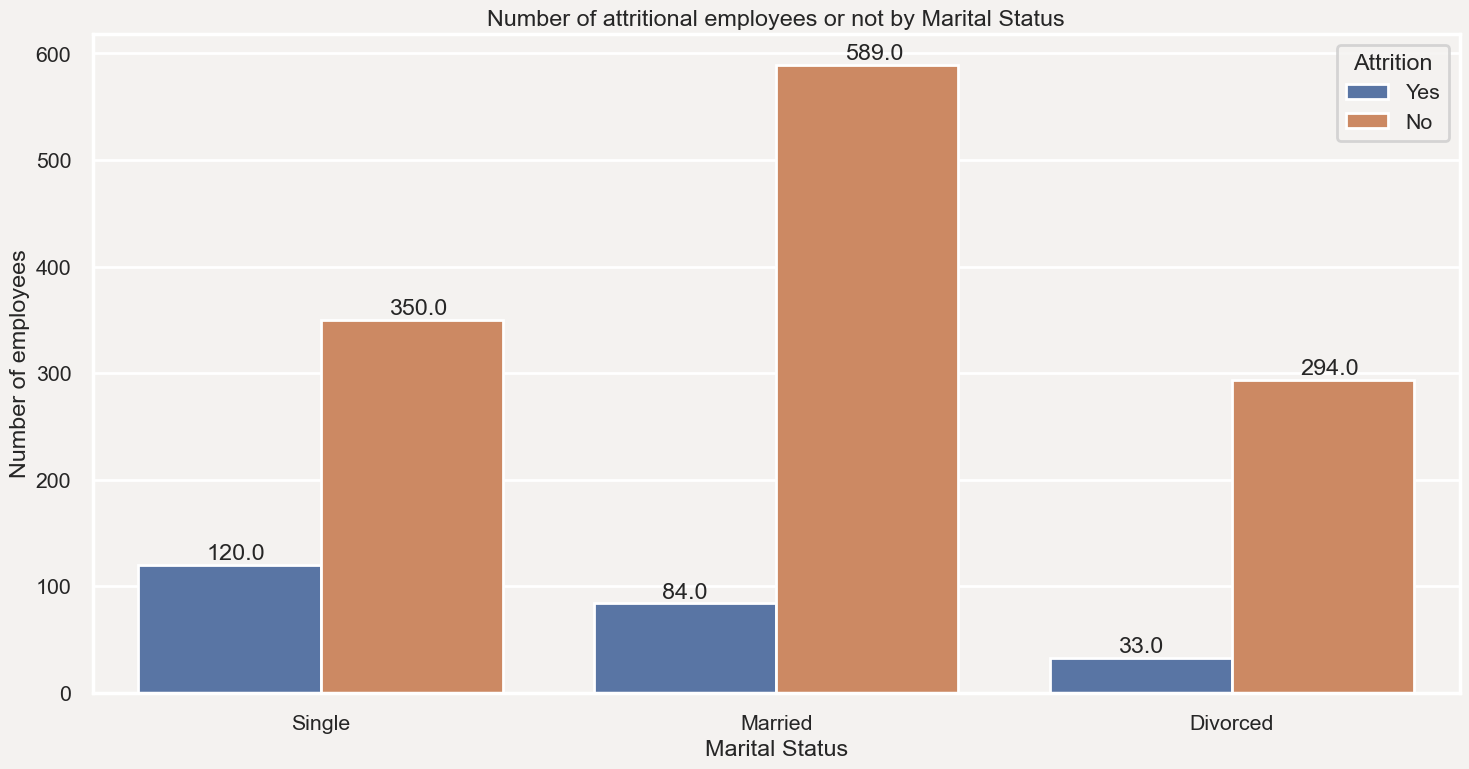

In [35]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
g = sns.countplot(x="MaritalStatus", hue="Attrition", data=df)
g.set(title="Number of attritional employees or not by Marital Status")
g.set_xlabel("Marital Status")
g.set_ylabel("Number of employees")
g.set_yticks(range(0, 700, 100))
for p in g.patches:
    g.annotate("{}".format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 5))
plt.show()

Based on the compound column chart, we have the following comments:
- The percentage of employees who are married accounts for the largest number, this is completely appropriate when the age of employees in this company is from 26-40 accounting for about 60% (Figure 9), this is the appropriate age to set up a company. family.
- The rate of single employees, although ranked second, has the highest turnover rate. This can be seen that young and free people (not having to worry about family) tend to "jump work" to experience many different working environments and find jobs that match their interests.

## Chart 12

**Title:** Monthly income by total years of work and job rank

**Chart type:** Scatter plot

**Visualization:**

In [36]:
plot_df = df.copy()
plot_df["JobLevel"] = pd.Categorical(plot_df["JobLevel"]).rename_categories(
    ["Entry level", "Mid level", "Senior", "Lead", "Executive"]
)
col = ["#88C9D1", "#CCD188", "#707BAD", "#48795E", "#C99193"]
fig = px.scatter(
    plot_df,
    x="TotalWorkingYears",
    y="MonthlyIncome",
    color="JobLevel",
    size="MonthlyIncome",
    color_discrete_sequence=col,
    category_orders={
        "JobLevel": ["Entry level", "Mid level", "Senior", "Lead", "Executive"]
    },
)

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    title="<b>Monthly income according to the total number of years of work and level in the job </b>",
    title_font=dict(size=15, family="Verdana", color="#003566"),
    xaxis_title="Total Working Years",
    yaxis=dict(title="Monthly income", tickprefix="$"),
    legend_title="",
    font_color="#28221D",
    margin=dict(l=40, r=30, b=80, t=120),
    paper_bgcolor="#F4F2F0",
    plot_bgcolor="#F4F2F0",
    height=500,
    width=1000,
)
fig.show()

Based on the scatter plot above, we can see:
- The higher the rank in the job, the more monthly income tends to be.
- Levels such as: Entry level, Mid level have the number of working years in the range of 0 - 20 years. While to be able to be in the highest position of Executive, it is necessary to work for more than 20 years, even over 35 years.

## Chart 13

**Title:** Level of job satisfaction and balance by age.

**Chart type:** Line plot

**Visualization:**

In [37]:
def year_stats(year):
    return year // 5


df_ = df.copy()
df_["year_stats"] = df_["YearsAtCompany"].map(year_stats)

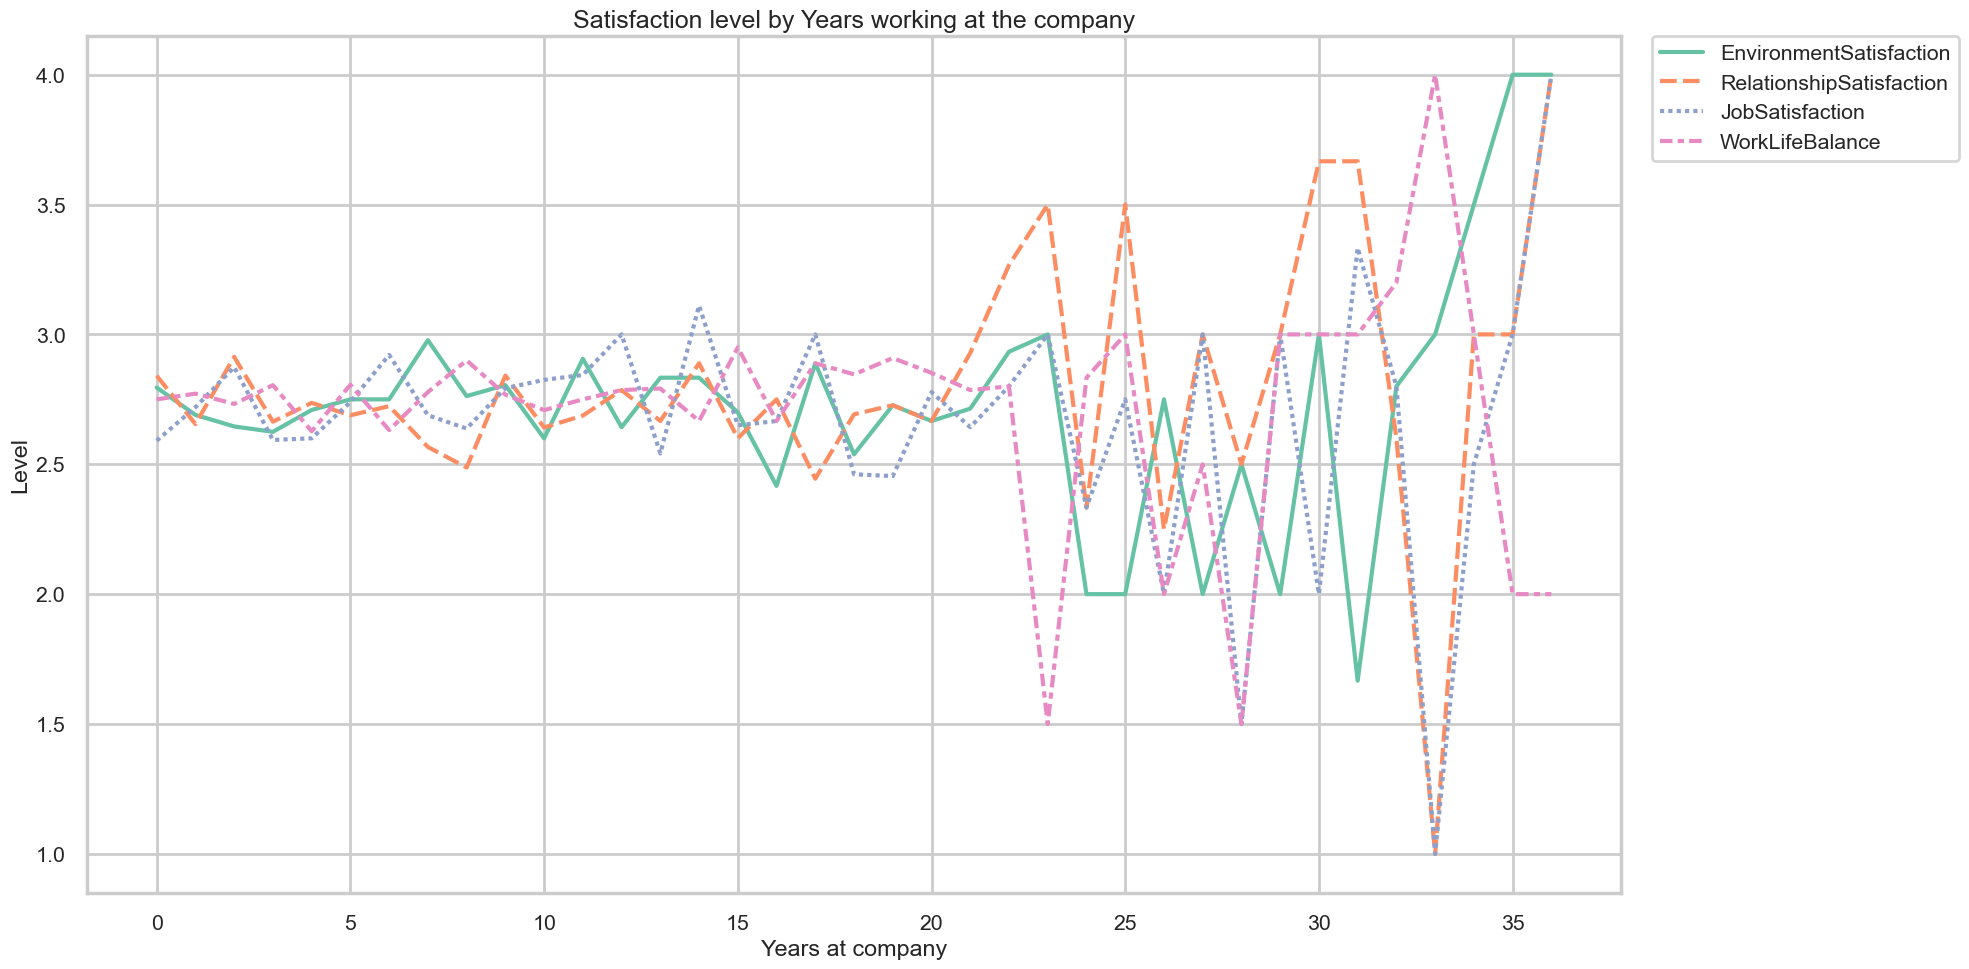

In [38]:
df_satis = df_[
    [
        "EnvironmentSatisfaction",
        "RelationshipSatisfaction",
        "JobSatisfaction",
        "WorkLifeBalance",
        "YearsAtCompany",
        "year_stats",
    ]
]
df_satis_year = (
    df_satis.groupby("YearsAtCompany")[
        [
            "EnvironmentSatisfaction",
            "RelationshipSatisfaction",
            "WorkLifeBalance",
            "JobSatisfaction",
        ]
    ]
    .mean()
    .reset_index()
)
sns.set_palette("Set2")
sns.set_style("whitegrid")
plt.subplots(figsize=(20, 10))
sns.lineplot(
    data=df_satis_year[
        [
            "EnvironmentSatisfaction",
            "RelationshipSatisfaction",
            "JobSatisfaction",
            "WorkLifeBalance",
        ]
    ]
)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.title("Satisfaction level by Years working at the company", fontsize=18)

plt.xlabel("Years at company")
plt.ylabel("Level")
plt.show()

- There is a clear difference between employee satisfaction by age, which is clearly separated at the 20th working year.
- Group under 20 years old: less volatile, fluctuates at 2.5-3.
- Group over 20 years old:
     - More volatility. The more you stick with the company, the more you can access different aspects of the job, the more diverse the needs that people require at work.
     - Work-life balance often tends to be the opposite of the rest of the characteristics. This shows job satisfaction in 3 aspects (environment, relationship, work) that are often parallel and related to each other. In addition, satisfaction is also a great motivation for employees, they tend to spend more time on work. Since then, the time for other life activities is also reduced, affecting work-life balance.
     - The more attached to the company, the more obvious the influence. Even then the employees already have working experience in that company.
    

## Chart 14

**Title:** Salary distribution according to job position and people's satisfaction level.

**Chart type:** Dot and jitter plot.

**Visualization:**

In [39]:
df_["satisfaction"] = (
    df_["JobSatisfaction"]
    + df_["EnvironmentSatisfaction"]
    + df_["RelationshipSatisfaction"]
) / 3

In [40]:
stripplot = (
    alt.Chart(df_, width=120, title="Monthly income by Job Roles and Attrition rate")
    .mark_circle(size=11)
    .encode(
        # color = "Attrition",
        color=alt.Color("Attrition", scale=alt.Scale(scheme="dark2")),
        x=alt.X(
            "jitter:Q",
            title=None,
            axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
            scale=alt.Scale(),
        ),
        y=alt.Y("MonthlyIncome:Q"),
        # color=alt.Color('JobRole:N', legend=None),
        column=alt.Column(
            "JobRole:N",
            header=alt.Header(
                labelAngle=0,
                titleOrient="top",
                labelOrient="bottom",
                labelAlign="center",
                labelPadding=10,
            ),
        ),
        tooltip=["JobRole", "MonthlyIncome"],
    )
    .transform_calculate(
        # Generate Gaussian jitter with a Box-Muller transform
        jitter="sqrt(-2*log(random()))*cos(2*PI*random())"
    )
    .configure_facet(spacing=0)
    .properties(width=125, height=500)
    .configure_title(
        fontSize=20, anchor="middle", color="gray"  # <---- does not take effect, why?
    )
)
stripplot

alt.Chart(...)

- Salary distribution of different positions. In which the highest are Manager and Research Director, these are management positions. These are also the 2 groups with the lowest number of "regret" employees.
- Human Resources positions have a small number, but the salary range is also quite wide, showing that although this profession has few employees, the salary also varies among individuals.
- When dividing about Attrition rating, we see a clear grouping with 2 positions: Human Resources and Sales Representative. Those who vote Yes are in the lower salary group, so it can be seen that salary has a lot of influence on employees' evaluation of jobs in these two industries. In the remaining industries, Attrition vote does not have much difference in salary ranks (the dots are quite mixed together).